In [ ]:
#libraries used
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import yfinance as yf

In [ ]:
# Fetch the data
df = yf.download('MBG.DE', start='2010-03-24', end='2024-03-24')
df
hmc = yf.download('HMC', start='2010-03-24', end='2024-03-24')
pah3 = yf.download('PAH3.DE', start='2010-03-24', end='2024-03-24')
hymtf = yf.download('HYMTF', start='2010-03-24', end='2024-03-24')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:

# Fetch the data
df = yf.download('MBG.DE', start='2010-03-23', end='2024-03-23')
df


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-03-23,28.686970,28.899065,28.366747,28.653700,14.051908,5526158
2010-03-24,28.736876,28.815891,28.100588,28.686970,14.068223,6514359
2010-03-25,28.803413,29.269194,28.695288,29.123636,14.282369,7286396
2010-03-26,28.990559,29.393955,28.932335,29.094526,14.268089,5594493
2010-03-29,29.335733,29.547829,28.986399,29.069574,14.255852,5265106
...,...,...,...,...,...,...
2024-03-18,73.379997,73.940002,73.110001,73.360001,73.360001,1790934
2024-03-19,73.639999,74.230003,73.290001,74.150002,74.150002,2524749
2024-03-20,74.050003,74.050003,73.419998,73.800003,73.800003,1631620


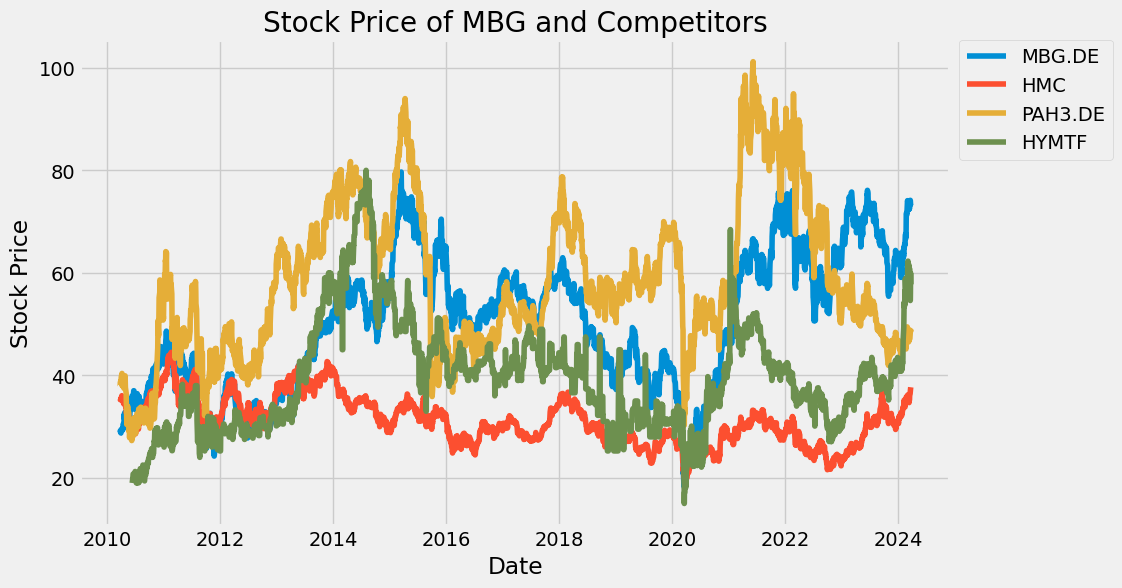

In [ ]:
# Plot the data
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df.index, df['Close'], label='mbg.de')
ax.plot(hmc.index, hmc['Close'], label='HMC')
ax.plot(pah3.index, pah3['Close'], label='PAH3.DE')
ax.plot(hymtf.index, hymtf['Close'], label='HYMTF')



# Add legend and labels
ax.legend(loc='upper left')
ax.set_xlabel('Date')
ax.set_ylabel('Stock Price')
ax.set_title('Stock Price of MBG and Competitors')

# Annotate the legend
legend = ax.legend(loc='upper left', bbox_to_anchor=(1.01, 1), borderaxespad=0)
legend_text = legend.get_texts()
legend_text[0].set_text('MBG.DE')
legend_text[1].set_text('HMC')
legend_text[2].set_text('PAH3.DE')
legend_text[3].set_text('HYMTF')



# Show the plot
plt.show()

In [ ]:
#Number of rows and columns
df.shape

(3560, 6)

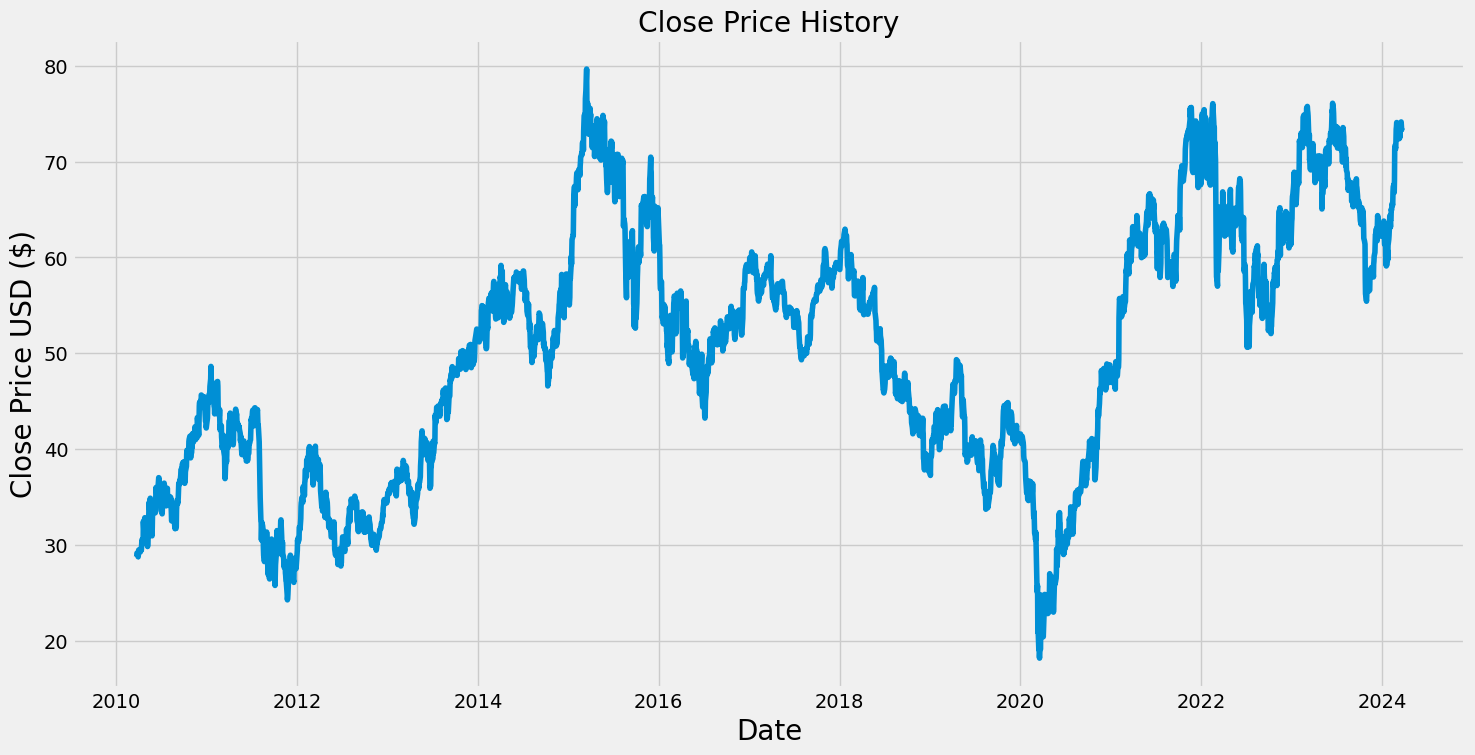

In [ ]:
#visualize the closing history
plt.figure(figsize= (16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=20)
plt.ylabel('Close Price USD ($)',fontsize=20)
plt.show()

In [ ]:
#create data frame with only "Close Column"
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil(len(dataset) * .8)
training_data_len

2848

In [ ]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.17052064],
       [0.17106155],
       [0.17816092],
       ...,
       [0.90451468],
       [0.89703583],
       [0.89963719]])

In [ ]:
#create the training data set
#create the scaled training data set
train_data = scaled_data[0:training_data_len,:]
#Split the data into x_train and y_train data sets

x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0])
  y_train.append(train_data[i,0])
  if i<=61:
    print(x_train)
    print(y_train)
    print()



[array([0.17052064, 0.17106155, 0.17816092, 0.17768765, 0.17728198,
       0.17200812, 0.17599733, 0.18343478, 0.18478702, 0.18363761,
       0.18039218, 0.18282624, 0.18350238, 0.19148073, 0.20054092,
       0.20114943, 0.19878297, 0.19560514, 0.23204872, 0.22461125,
       0.21649766, 0.23029077, 0.23840433, 0.21757947, 0.21534822,
       0.22927644, 0.22954703, 0.22684247, 0.21000676, 0.20527384,
       0.2040568 , 0.18945234, 0.21866128, 0.22738341, 0.24273157,
       0.2640974 , 0.25334688, 0.26024342, 0.27146721, 0.2482759 ,
       0.22393511, 0.22974984, 0.22508452, 0.2075727 , 0.22177148,
       0.24469239, 0.24962811, 0.25909401, 0.25895875, 0.25605138,
       0.26260991, 0.25070993, 0.24665315, 0.24881677, 0.27180528,
       0.2895876 , 0.28255579, 0.27964843, 0.27707913, 0.26098717])]
[0.2768762681887816]

[array([0.17052064, 0.17106155, 0.17816092, 0.17768765, 0.17728198,
       0.17200812, 0.17599733, 0.18343478, 0.18478702, 0.18363761,
       0.18039218, 0.18282624, 0.183

In [ ]:
#convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train),np.array(y_train)

In [ ]:
#Reshape the data
x_train = np.reshape(x_train,(x_train.shape[0], x_train.shape[1],1))
x_train.shape

(2788, 60, 1)

In [ ]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50,return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))


In [ ]:
#Compile the model
model.compile(optimizer ='adam', loss = 'mean_squared_error')


In [ ]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)


2788/2788 [==============================] - 98s 34ms/step - loss: 0.0016


In [ ]:
# Create testing dataset
# Create new array containing scaled values from index
test_data = scaled_data[training_data_len - 60:,:]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i,0])




In [ ]:
#Convert the data to a numpy array
x_test = np.array(x_test)


In [ ]:
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [ ]:
#get the models predicted price models
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

23/23 [==============================] - 1s 18ms/step


In [ ]:

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean((predictions - y_test)**2))
print("RMSE:",rmse)

# Mean Absolute Error (MAE)
mae = np.mean(np.abs(predictions - y_test))
print("MAE:", mae)

RMSE: 3.444470864026028
MAE: 3.1009252419632474


<ipython-input-48-b17dba27c001>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


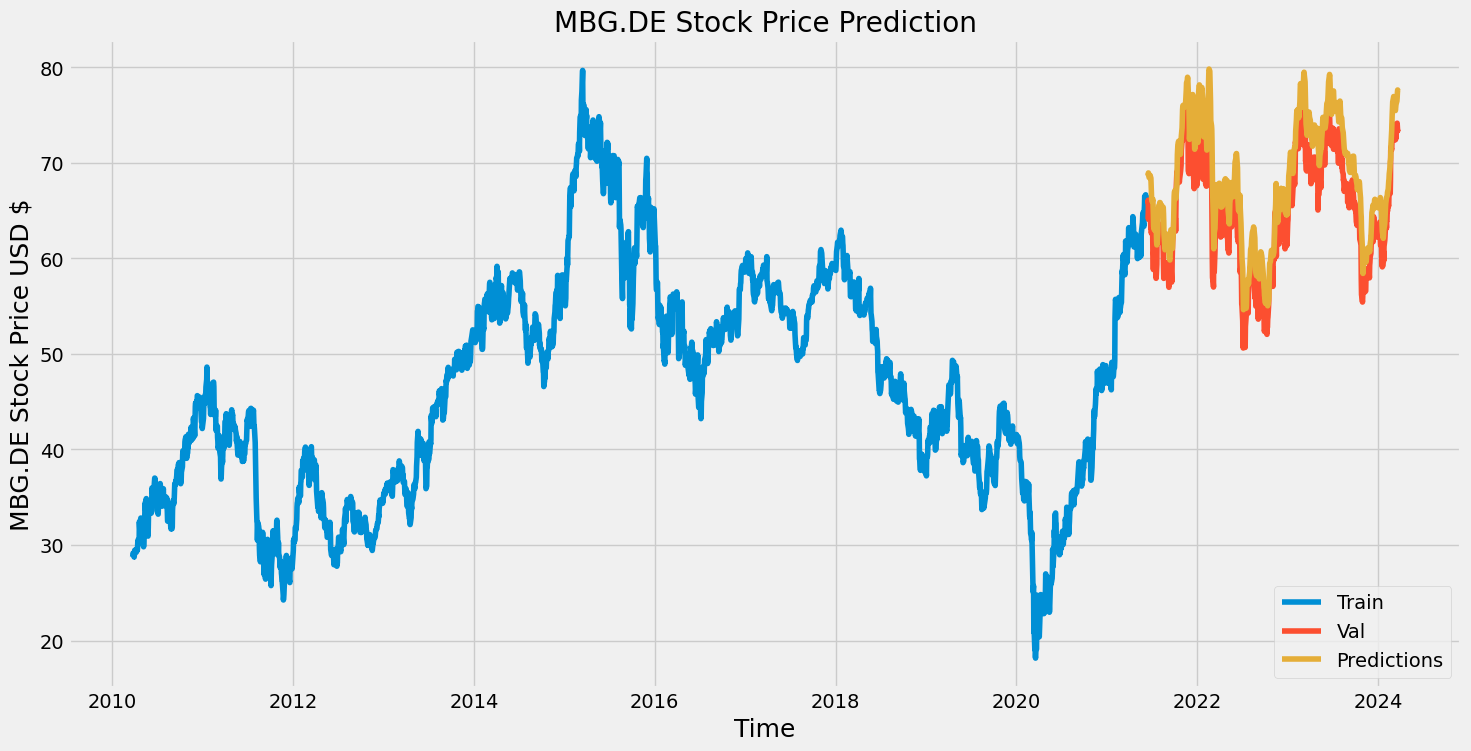

In [ ]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the model
plt.figure(figsize =(16,8) )
plt.title('MBG.DE Stock Price Prediction')
plt.xlabel('Time',fontsize = 18)
plt.ylabel('MBG.DE Stock Price USD $', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val','Predictions'],loc='lower right')
plt.show()



In [ ]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2021-06-16,65.741318,68.628044
2021-06-17,66.090652,68.747192
2021-06-18,64.111092,68.946228
2021-06-21,66.007477,68.459198
2021-06-22,65.982529,68.498047
...,...,...
2024-03-18,73.360001,76.468712
2024-03-19,74.150002,76.809715
2024-03-20,73.800003,77.338951


In [ ]:
import pandas as pd
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Get the quote
mbg_quote = yf.download('MBG.DE', start='2014-01-01', end='2024-03-22')

# Create a new data frame
new_df = mbg_quote['Close']

# Get the last 30 days' closing price values
last_30_days = new_df.values[-30:]

# Create a scaler object
scaler = MinMaxScaler()

# Scale the data to be values between 0 and 1
last_30_days_scaled = scaler.fit_transform(last_30_days.reshape(-1, 1))

# Create an empty list
X_test = []

# Append the past 30 days
X_test.append(last_30_days_scaled)

# Convert X_test to a numpy array
X_test = np.array(X_test)

# Reshape data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Get the predicted, scaled price
pred_price = model.predict(X_test)

# Undo the scaling
pred_price = scaler.inverse_transform(pred_price)

print("Closing stock price on 23rd April,2024 is",pred_price)


[*********************100%%**********************]  1 of 1 completed

1/1 [==============================] - 0s 40ms/step
Closing stock price on 23rd April,2024 is [[74.45592]]


[*********************100%%**********************]  1 of 1 completed

An error occurred: cannot reshape array of size 0 into shape (0,newaxis)
